#  ПРИКЛАД ВИКОНАННЯ ЛАБОРАТОРНОЇ РОБОТИ № 3. ПРОСТОРОВА ФІЛЬТРАЦІЯ
#  1. Розмивання зображення за допомогою фільтра Гауса

In [2]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 18

In [3]:
## Завантаження файлу зображення
## filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/io_test_01.jpg'
filename = 'd:/_Doc_Vol_My_/_GIT_/2020/2020_Digita_Image_Processing/Test_Images/COCO_test_000579836.jpg'
test_im = io.imread(filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (480, 640, 3) IMAGE SIZE 921600
ROWS NUMBER 480 CLMS NUMBER 640 PIX NUMBER 307200 Bins 256


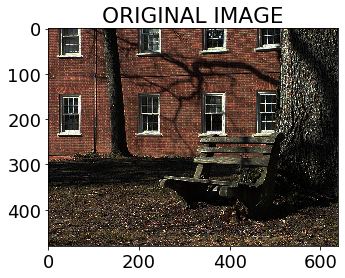

In [4]:
## Вивід оррігінального зображення на екран
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

MASK SHAPE (5, 5, 1) MASK SIZE 25


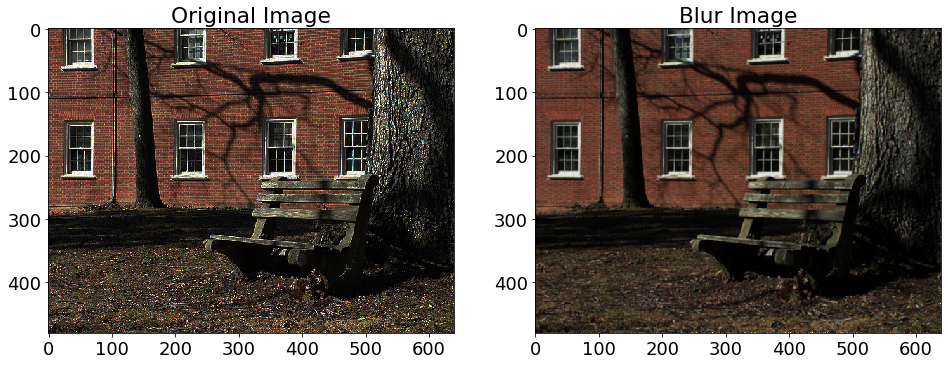

In [7]:
## Визначення маски фильтру розмиття
mask_row = 5
mask_clm = 5
mask_blur = np.zeros ( (mask_row, mask_clm, 1), dtype=np.float32)
print ('MASK SHAPE', mask_blur.shape, 'MASK SIZE', mask_row*mask_clm)
mask_blur[0,0] = mask_blur[4,0] = mask_blur[0,4] = mask_blur[4,4] = 0.000789
mask_blur[0,1] = mask_blur[0,3] = mask_blur[1,0] = mask_blur[1,4] = mask_blur[3,0] = mask_blur[3,4] = mask_blur[4,1] = mask_blur[4,3] = 0.006581
mask_blur[0,2] = mask_blur[2,0] = mask_blur[2,4] = mask_blur[4,2] = 0.013347
mask_blur[1,1] = mask_blur[1,3] = mask_blur[3,1] = mask_blur[3,3] = 0.054901
mask_blur[1,2] = mask_blur[2,1] = mask_blur[2,3] = mask_blur[3,2] = 0.111345
mask_blur[2,2] = 0.225821

## print('FILTER MASK')
## print(mask_blur[:,:])

## Визначення файлу перевореного зображення
filtr_im_blur = np.zeros ( (rows_num, clms_num, 3), dtype=np.int8)
filtr_im_blur = test_im.copy()

for i in  range (2, (rows_num-2), 1):
    for j in  range (2, (clms_num-2), 1):
        filtr_im_blur [i, j, :] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                # fiter image
                filtr_im_blur [i, j, :] += np.uint8(mask_blur[l,k]*test_im [i-(2-k), j-(2-l), :])
        
## СУМІСНИЙ ОРИГІНАЛЬНОГО та ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_blur)
ax[1].set_title("Blur Image")
plt.show()

## ГІСТОГРАМА РОЗМИТОГО ЗОБРАЖЕННЯ

Gray_Im SAPE (480, 640, 3) Gray_Im SIZE 307200
L_Gisto SHAPE (256,) L_Gisto SIZE 256


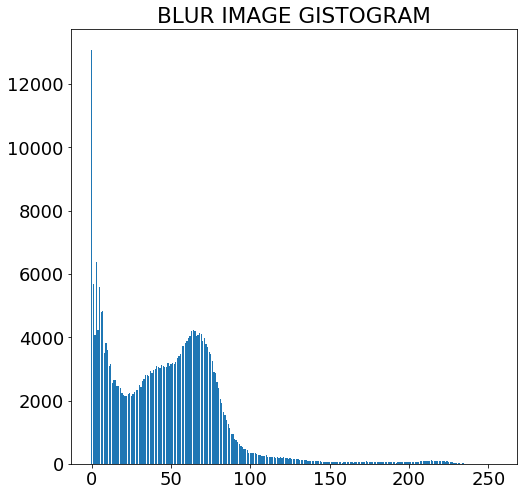

In [43]:
## Визначення масиву для гістограми РЗМИТОГО ЗОБРАЖЕННЯ
gray_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
L_gisto = np.zeros ( (bins), dtype=np.uint32)
print ('Gray_Im SAPE', gray_im.shape, 'Gray_Im SIZE', rows_num * clms_num)
print ('L_Gisto SHAPE', L_gisto.shape, 'L_Gisto SIZE', L_gisto.size)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        gray_im [i, j, :] = 0.299*filtr_im_blur[i, j, 0]+0.587*filtr_im_blur[i, j, 1]+0.114*filtr_im_blur[ i, j, 2]
        L_gisto[gray_im [i, j, 0]] += 1 
        
## Вивід ГІСТОГРАМИ
pix_index = np.arange(256) 
fig, ax = plt.subplots(figsize=(8,8))
plt.title('BLUR IMAGE GISTOGRAM')
ax.bar(pix_index, L_gisto)
plt.show()        
